In [1]:
import tensorflow as tf
import numpy as np

2023-11-02 07:41:30.114529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarni

In [2]:
x_train = []
y_train = []

# y = 2x+1
for x in range(1,100):
    x_train.append(x)
    y_train.append(x*2+1)

In [3]:
np.array(x_train).shape, np.array(y_train).shape

((99,), (99,))

In [4]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense

# y = w*x+b
model = models.Sequential()
model.add(Dense(1, input_dim=1))

2023-11-02 07:41:40.299697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 07:41:40.386166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 07:41:40.389207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
# 경사하강법의 종류를 선택
from tensorflow.keras.optimizers import SGD, Adam

adam = Adam(learning_rate=0.01, weight_decay=1e-5, beta_1=0.99, beta_2=0.99)

# 모델의 평가 조건
model.compile(loss='mse', 
              optimizer=adam)

history_adam = model.fit(x_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
4/4 [==============================] - 1s 3ms/step - loss: 0.1056
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2894
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0691
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1448
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0330
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2176
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0710
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0438
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1805
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0925
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1067
Epoch 13/500
4/4 [==============================] - 0s 3ms/st

In [7]:
# 경사하강법의 종류를 선택
from tensorflow.keras.optimizers import SGD, Adam

sgd = SGD(learning_rate=0.0001, weight_decay=1e-7, momentum=0.9)

# 모델의 평가 조건
model.compile(loss='mse', 
              optimizer=sgd)

history_sgd = model.fit(x_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
4/4 [==============================] - 0s 3ms/step - loss: 6.1606e-05
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 4.0212e-05
Epoch 3/500
4/4 [==============================] - 0s 3ms/step - loss: 6.0282e-05
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 2.7378e-05
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 2.4434e-05
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 1.2115e-05
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 7.1664e-06
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 4.1752e-06
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 1.9441e-06
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 1.3760e-06
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 9.5847e-07
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 6.8049e-07
Epoch 13/500


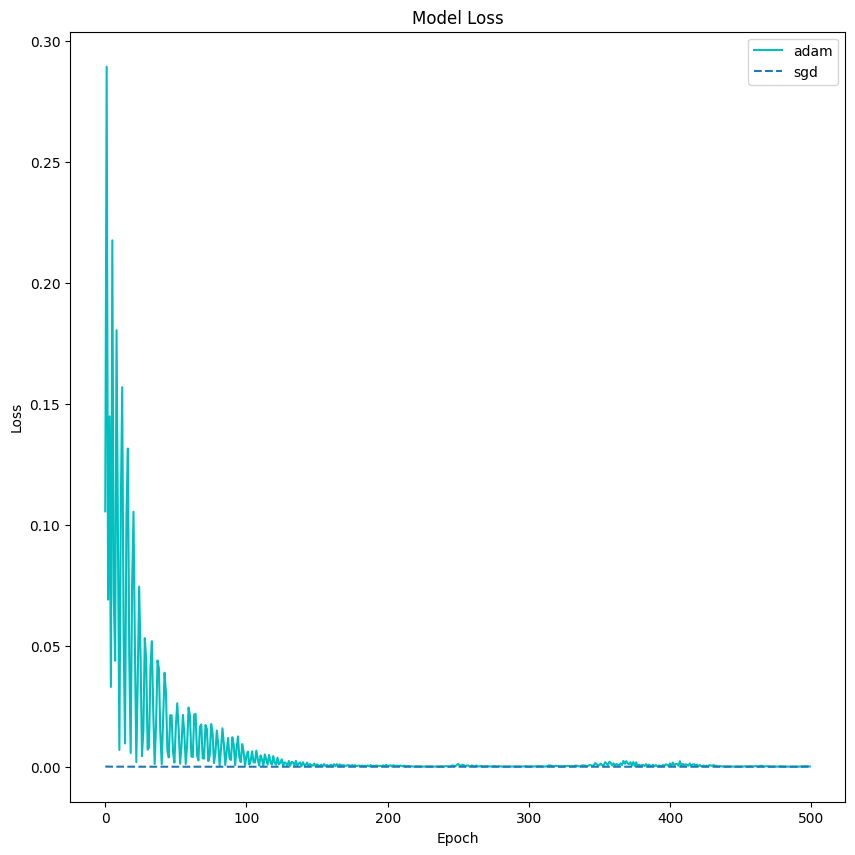

In [8]:
import matplotlib.pyplot as plt

def plot_model(history): 
    
    # summarize history for loss
    plt.rcParams["figure.figsize"] = (10,10)
    plt.plot(history_adam.history['loss'], 'c') 
    plt.plot(history_sgd.history['loss'], '--') 
    plt.title('Model Loss')
    plt.ylabel('Loss') 
    plt.xlabel('Epoch')
    plt.legend(['adam','sgd'], loc='upper right')
    plt.show()
    
plot_model(model.history)

In [10]:
history_adam.history

{'loss': [0.10559298098087311,
  0.2894020974636078,
  0.06907638162374496,
  0.1448427140712738,
  0.03297581151127815,
  0.2176123708486557,
  0.07099948078393936,
  0.043825309723615646,
  0.18046486377716064,
  0.09252988547086716,
  0.006929042283445597,
  0.10666412115097046,
  0.15689213573932648,
  0.053419340401887894,
  0.009630856104195118,
  0.10364814102649689,
  0.13154874742031097,
  0.045173659920692444,
  0.005694853141903877,
  0.07419202476739883,
  0.10543631762266159,
  0.04970035329461098,
  0.0019107046537101269,
  0.03589293360710144,
  0.07447019964456558,
  0.04575019329786301,
  0.0043932790867984295,
  0.014829752035439014,
  0.05316973105072975,
  0.04413522034883499,
  0.007073838729411364,
  0.00796330627053976,
  0.040752559900283813,
  0.05190008878707886,
  0.02222462370991707,
  0.0011231021489948034,
  0.01750427484512329,
  0.043928347527980804,
  0.04064379259943962,
  0.013661649078130722,
  0.0010262976866215467,
  0.019542165100574493,
  0.03887